   # PI3KCA: Effects of Mutation on IRS1

<b>Standard imports for playing with and plotting data frames.</b>

In [9]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

<b>Import CPTAC data</b>

In [10]:
import CPTAC

In [11]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

### IRS1 protein abundance with PI3KCA mutation

In [1]:
protList = ["IRS1"]
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 

NameError: name 'protList' is not defined

### We see that TP53 has a higher abundance when mutated

[Text(0,0.5,'Proteomics'), Text(0.5,0,'Somatic Gene Mutation')]

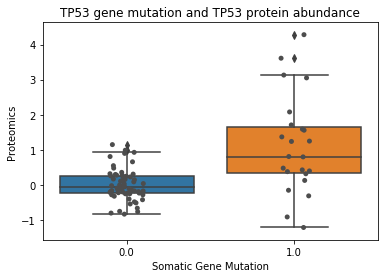

In [13]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=proteindfName)
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=proteindfName,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

### TP53 phosphorylation levels and TP53 Mutation

In [6]:
#Specify the gene and a general pattern for the sites you want to capture
#In this case, we want all the sites that begin with 'TP53'
gene = 'TP53'
sites = phos.filter(regex='TP53-')
sigResults = [];

#Create two dataframes: mutated and non-mutated with the sites specified
genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(sites, fill_value=0)
mutated = cross.loc[cross[gene] == 1.0]
wt = cross.loc[cross[gene] == 0.0]

#Bonferroni correction for multiple tests (we are testing multiple sites)
pcutoff = 0.05/len(cross.columns)

#Loop through all of the sites found and print out the ones with significant p-values
for loc in cross.columns:
    if not loc == gene:
        mutsitedf = mutated[[gene, loc]].dropna()
        wtsitedf = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(mutsitedf[loc], wtsitedf[loc])
        if ttest[1] <= pcutoff:
            sigResults.append(loc)
            print('Results for ' + loc + ': ')
            print(ttest)

Results for TP53-S315: 
Ttest_indResult(statistic=4.5116732692720705, pvalue=2.81407273681229e-05)


### We see that this site is generally phosphorylated at higher levels when TP53 is mutated

[Text(0,0.5,'Phosphoproteomics'), Text(0.5,0,'Somatic Gene Mutation')]

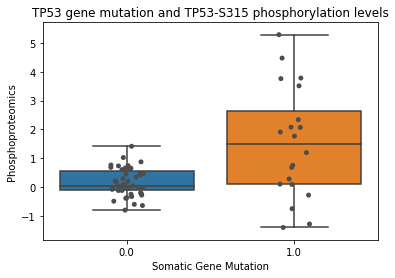

In [7]:
#sigResults is a list with all of the significant sites from the previous calculation (in this case there is only 1).
#Specify the index of the site you wish to visualize with x

x = 0
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=sigResults[x])
somatic_boxplot.set_title(gene + " gene mutation and " + sigResults[x] + " phosphorylation levels")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=sigResults[x],jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")